# **Modele BERT** 
**Réponse aux questions avec un BERT affiné**

Représentations d'encodeurs bidirectionnels à partir de transformateurs

Au lieu de regarder les mots isolément, BERT, un modèle basé sur un transformateur, tente d'utiliser le contexte des mots pour obtenir des incorporations. BERT utilise plusieurs concepts d'apprentissage en profondeur pour proposer un modèle qui examine le contexte de manière bidirectionnelle, en tirant parti des informations de l'ensemble des phrases dans leur ensemble grâce à l'attention personnelle.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!apt-get install poppler-utils

Reading package lists... Done
Building dependency tree       
Reading state information... Done
poppler-utils is already the newest version (0.62.0-2ubuntu2.14).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 5 not upgraded.


In [ ]:
!pip install pdf2image
!pip install easyocr

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from pdf2image import convert_from_path
import easyocr
import numpy as np
import PIL
from PIL import ImageDraw
import spacy

In [ ]:
# pour texte en Français mettre Fr
reader = easyocr.Reader(['en'])

In [ ]:
images = convert_from_path('/content/drive/MyDrive/Living in France.pdf')

In [ ]:
nb_pages =np.size(images)
print(nb_pages)

3


/usr/local/lib/python3.8/dist-packages/numpy/core/fromnumeric.py:3208: FutureWarning: The input object of type 'PpmImageFile' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'PpmImageFile', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  return asarray(a).size
/usr/local/lib/python3.8/dist-packages/numpy/core/fromnumeric.py:3208: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).size


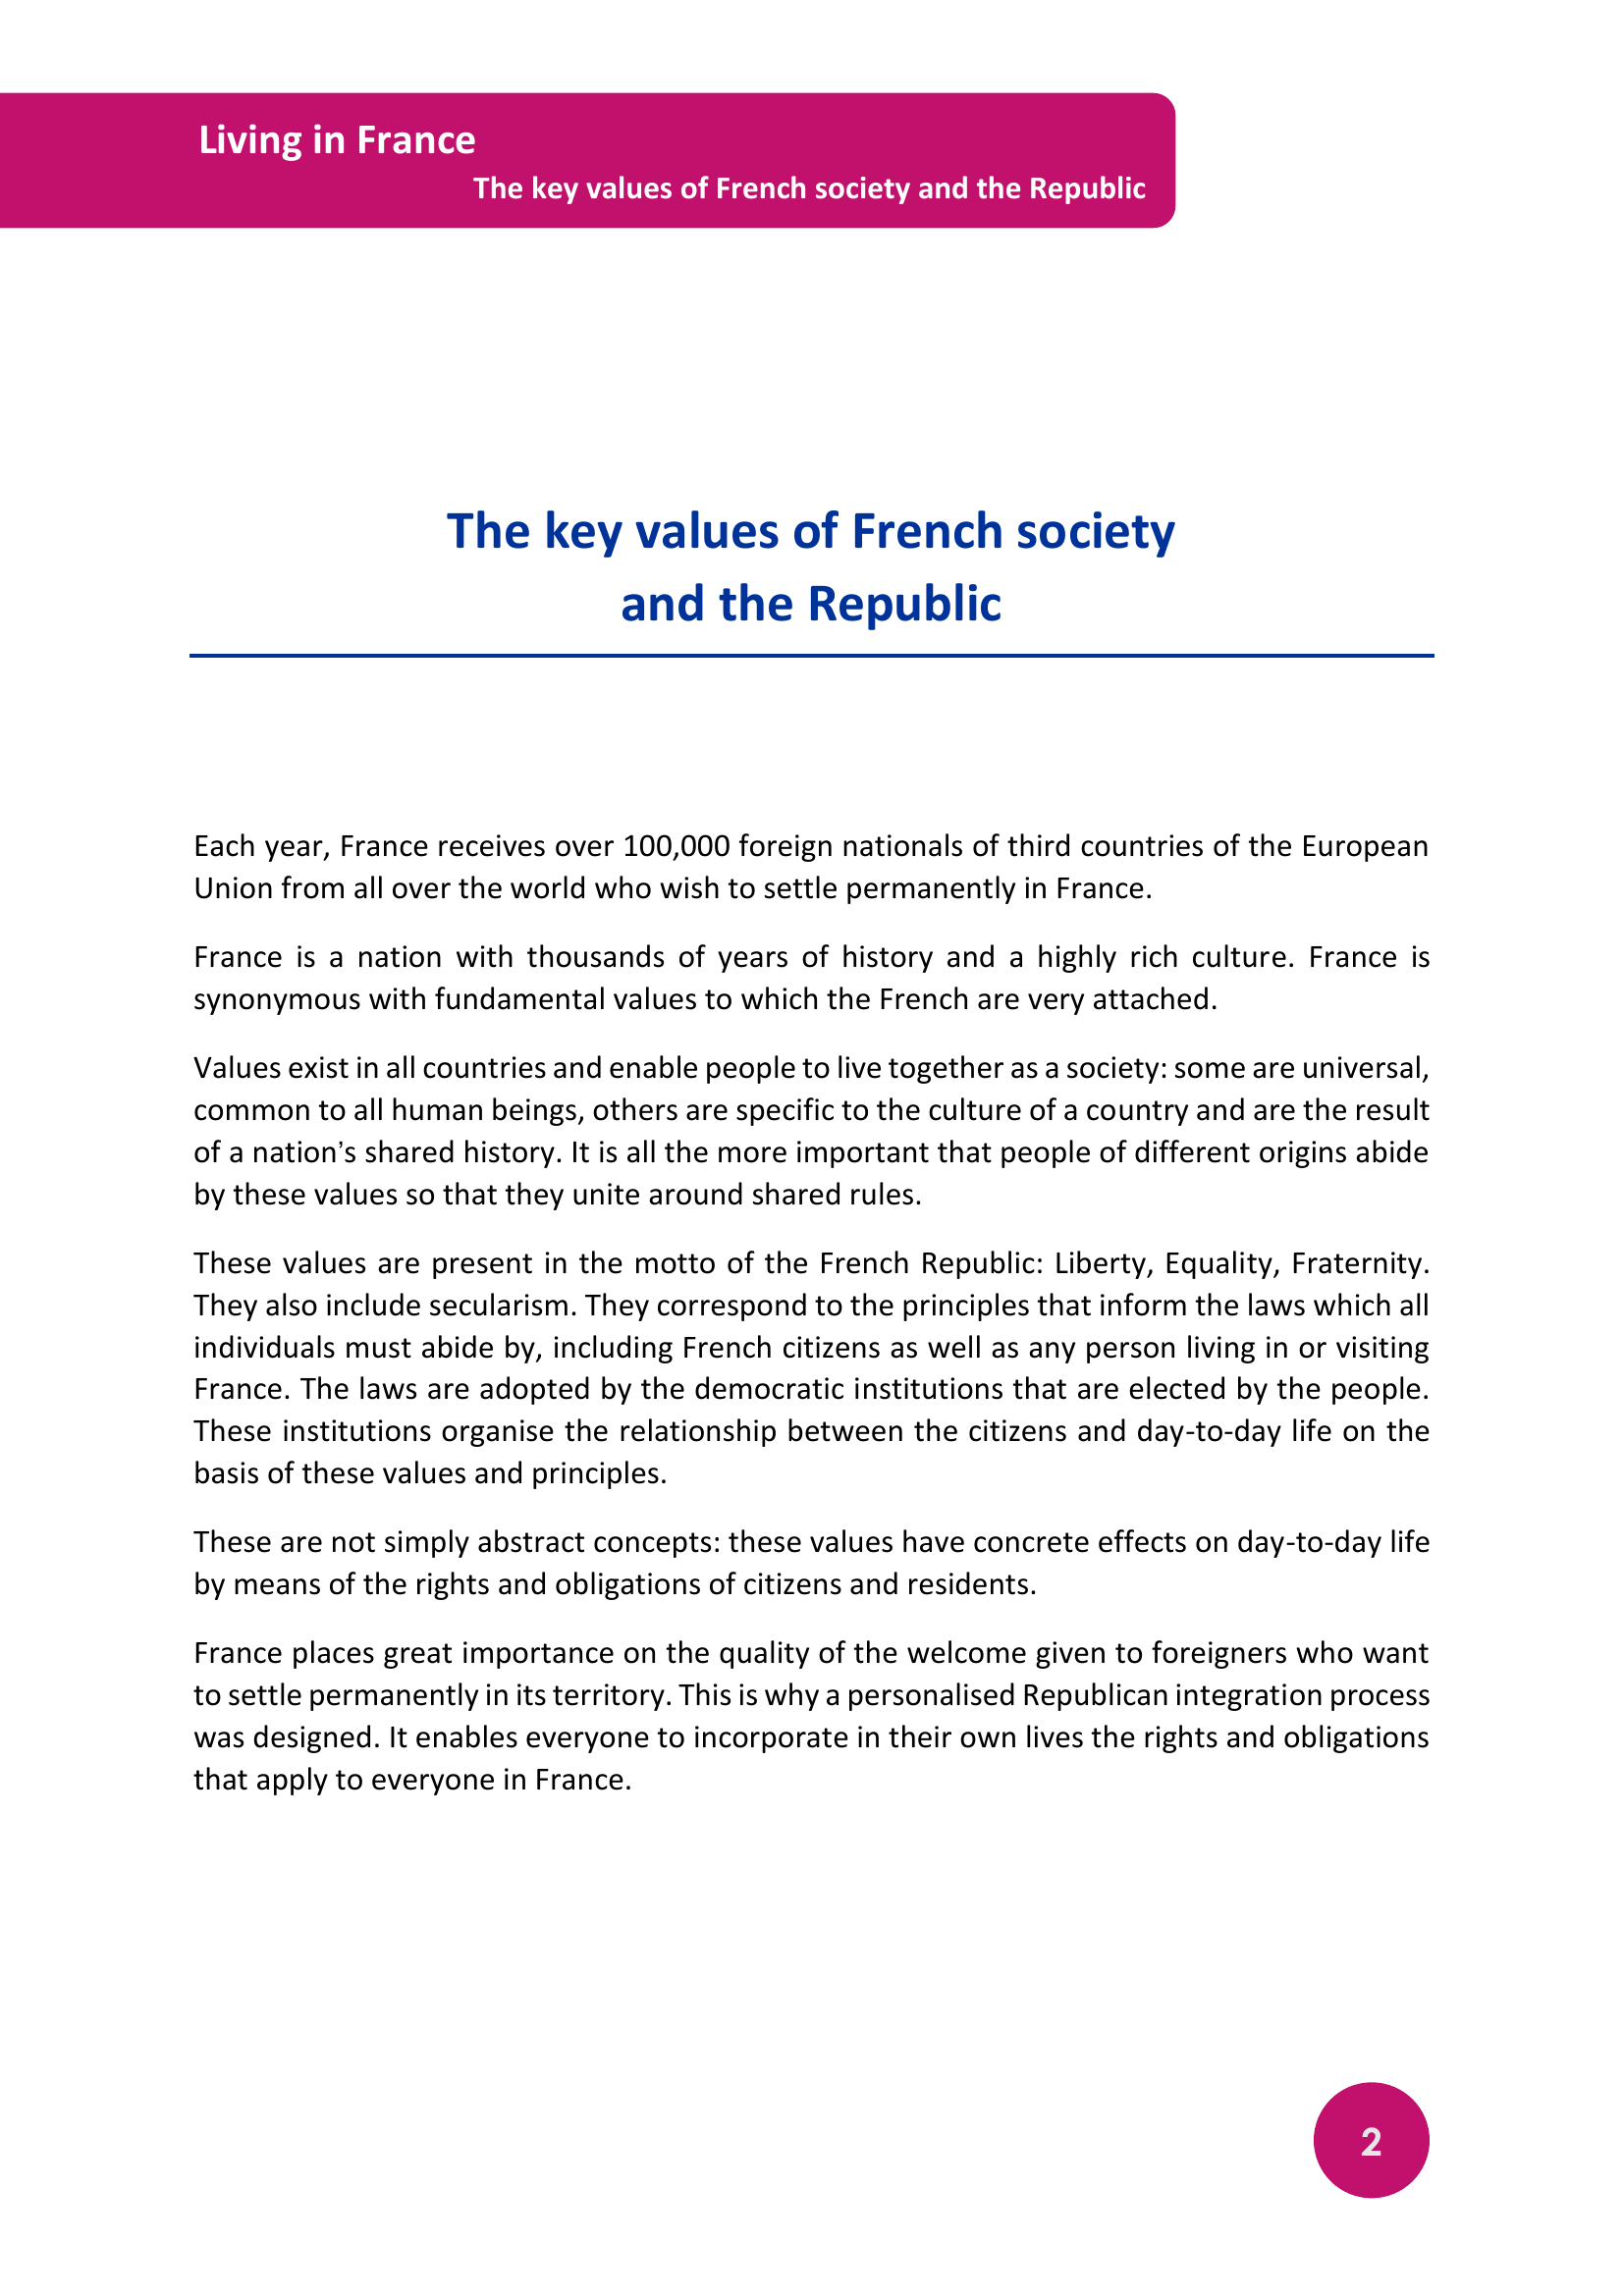

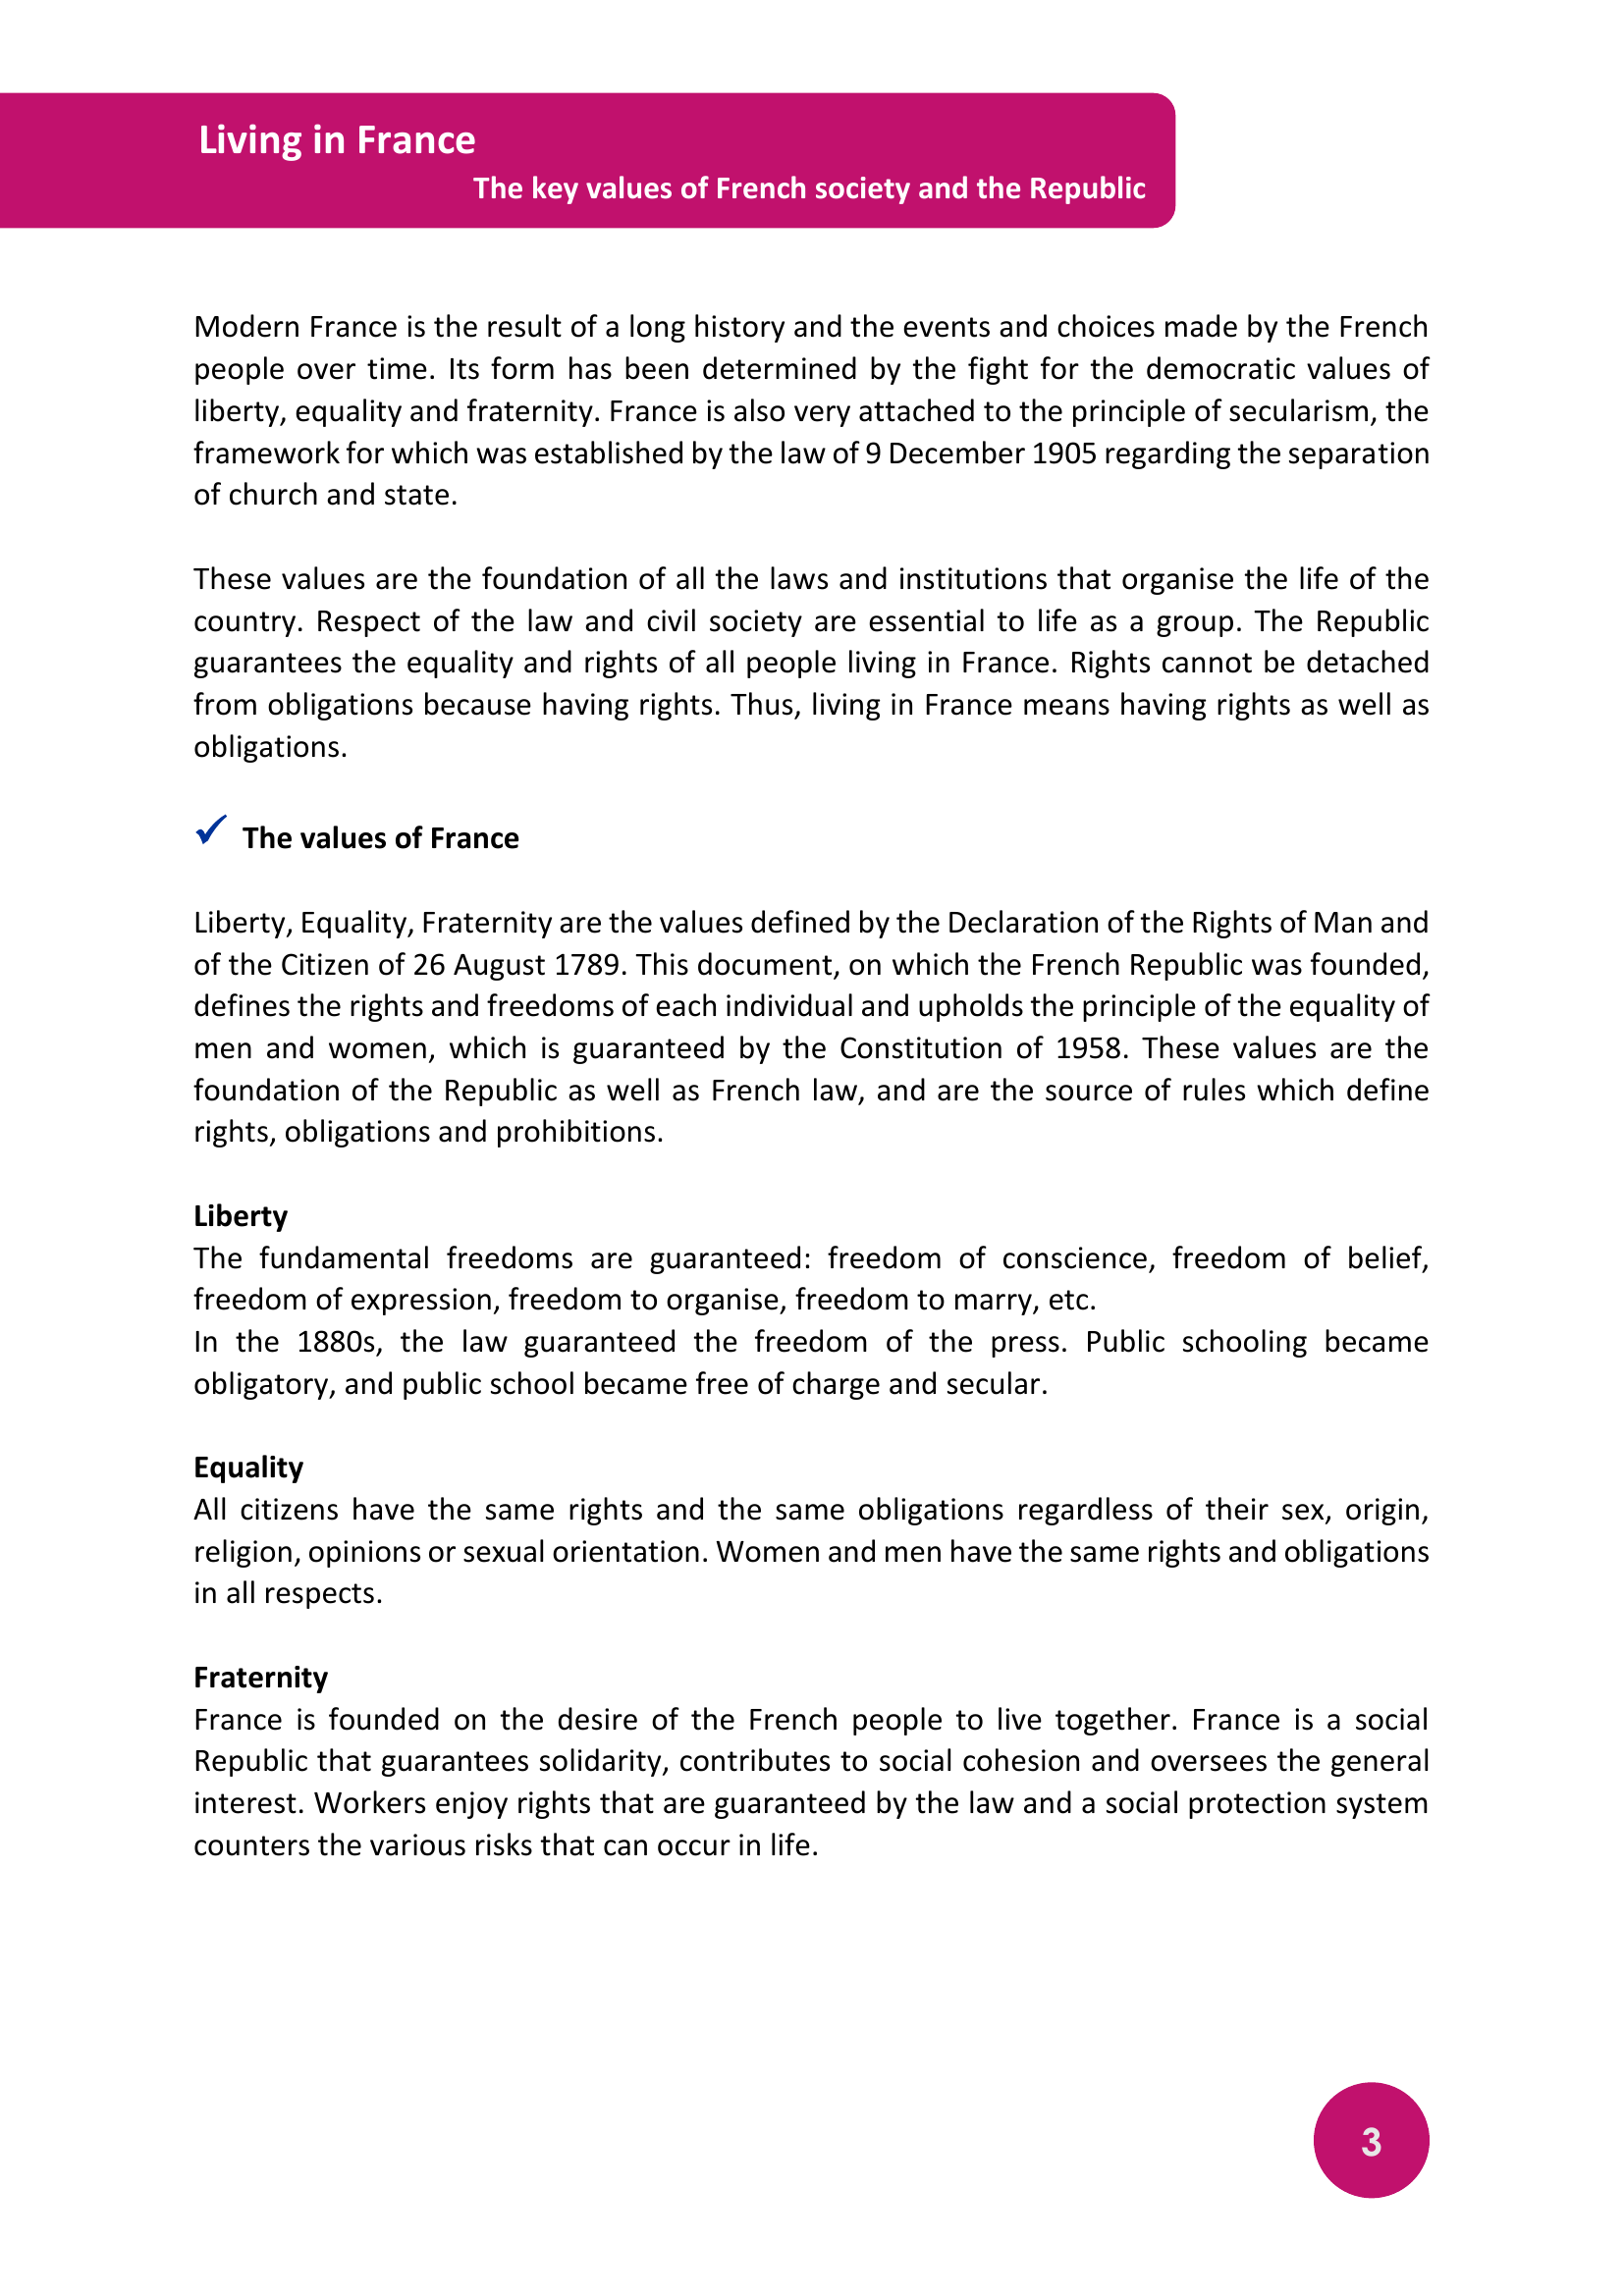

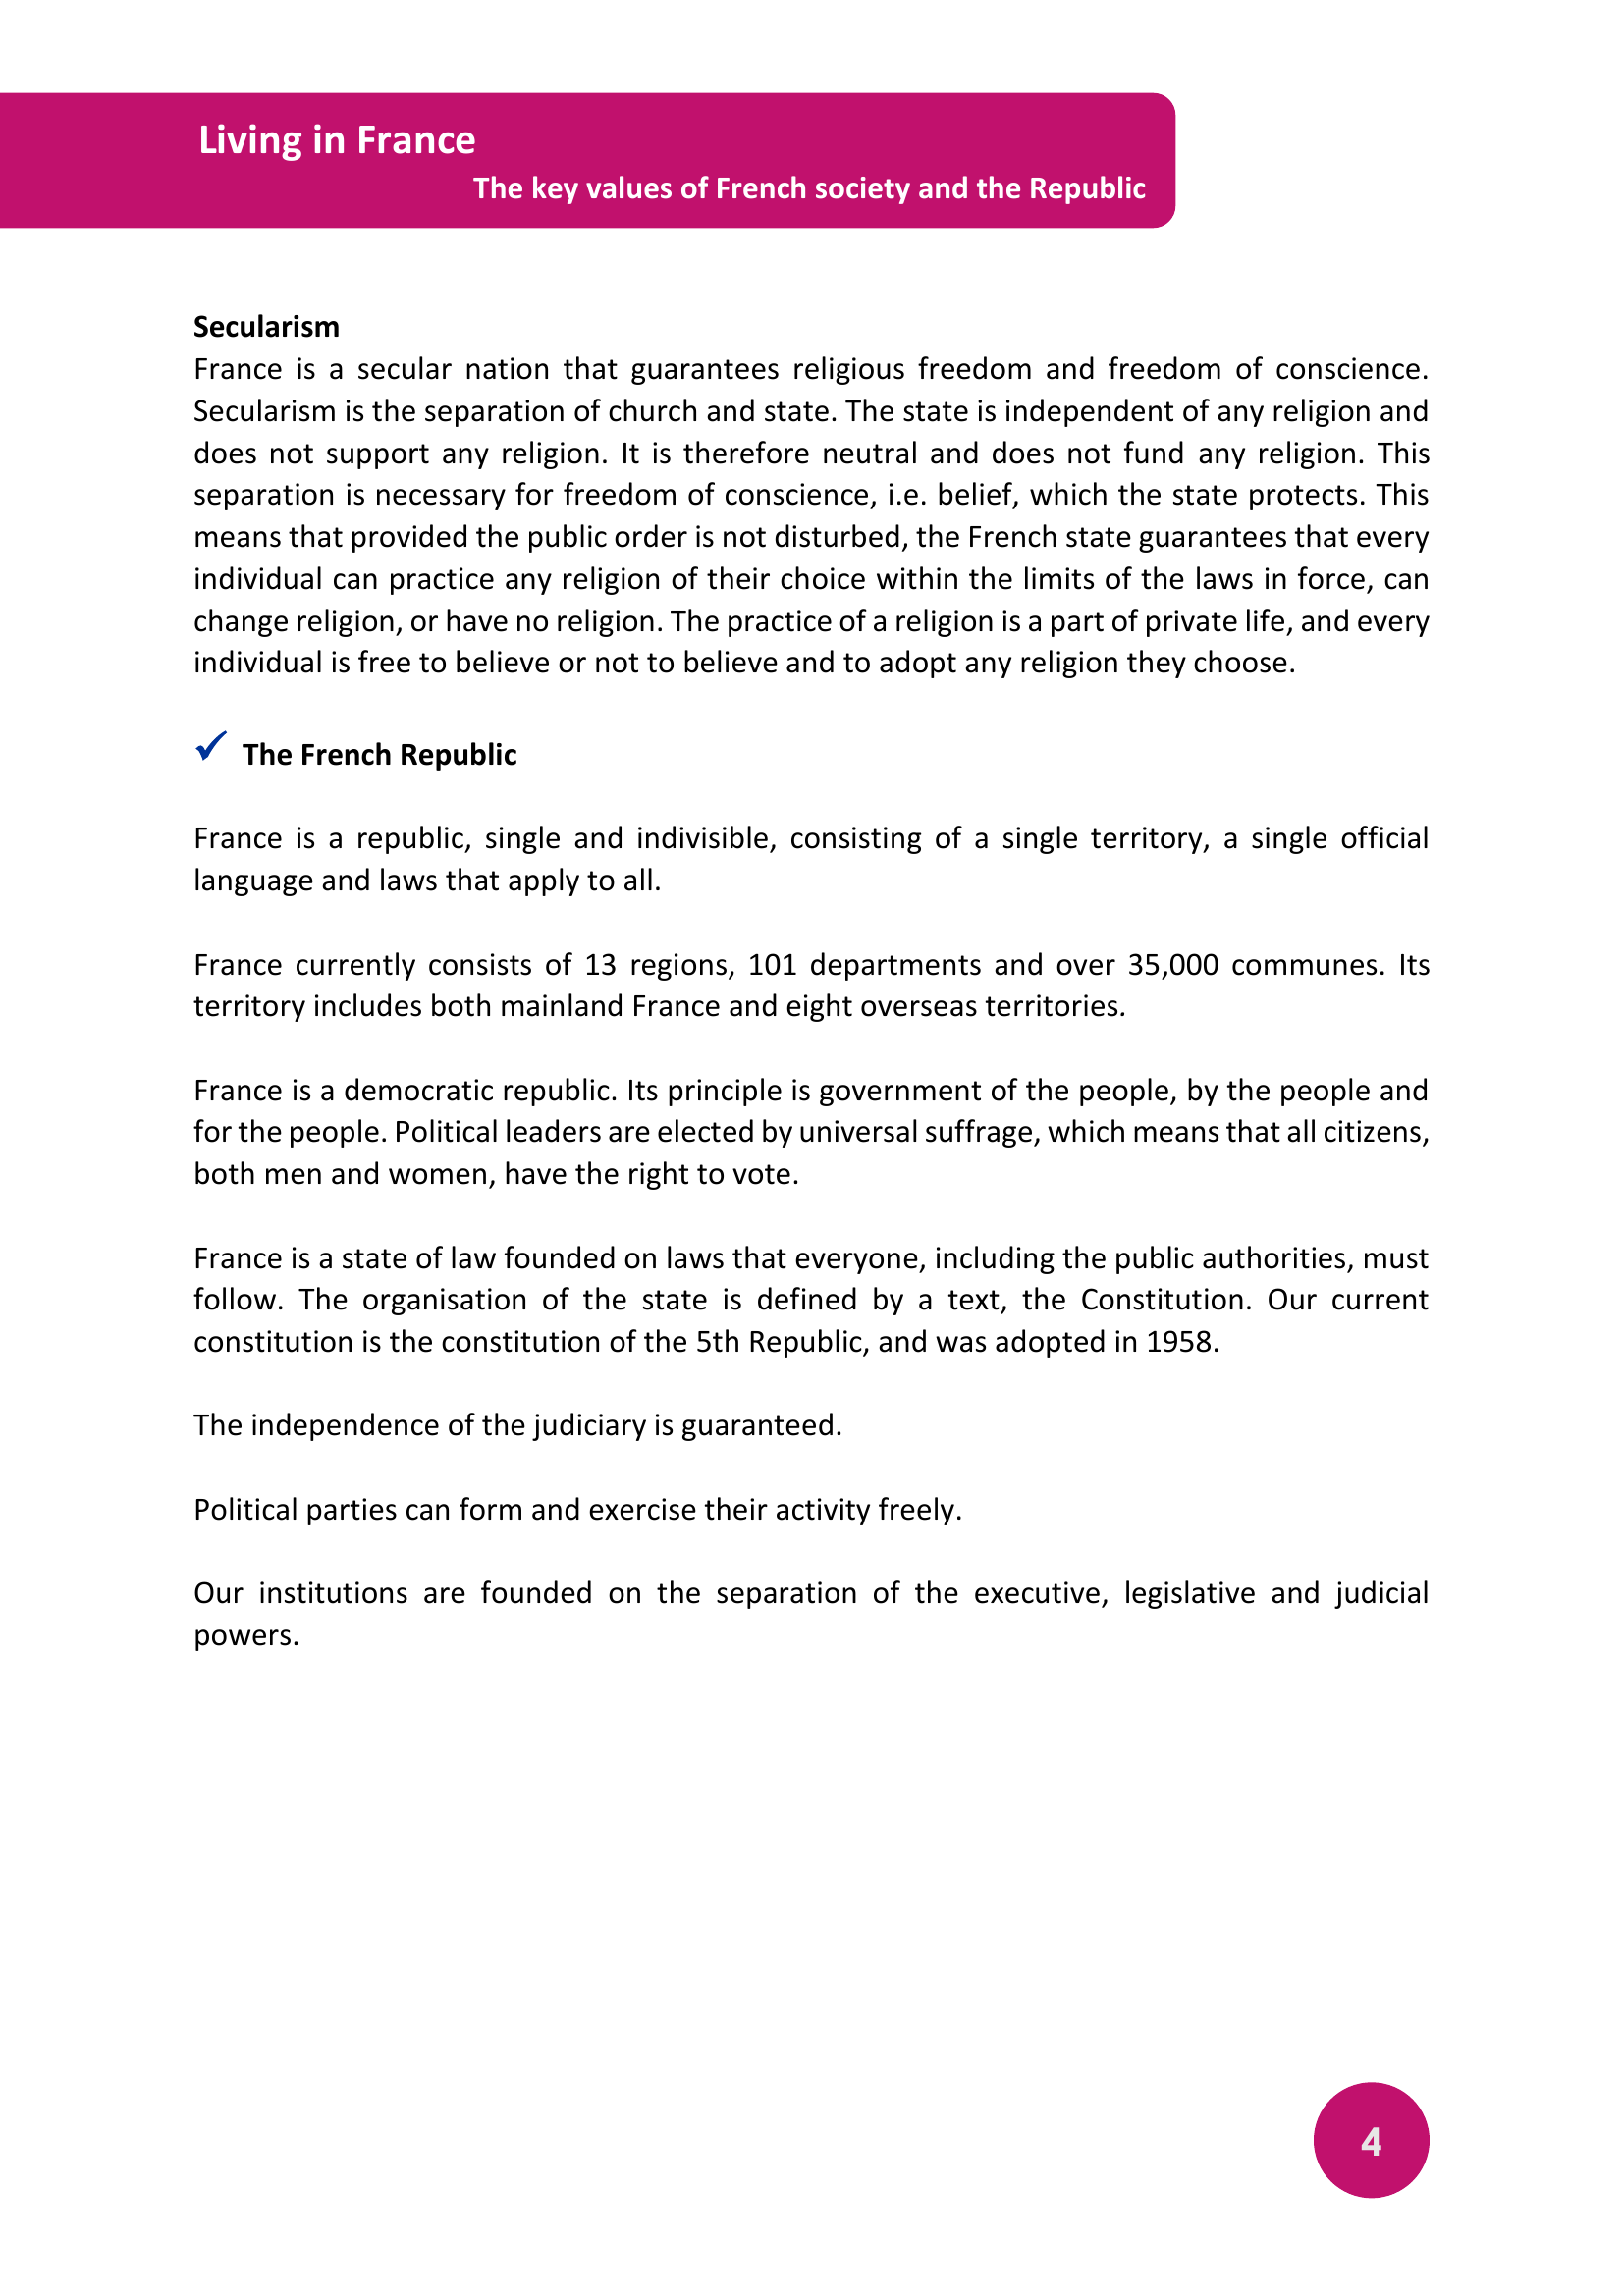

In [ ]:
for i in range (0,nb_pages):
  display(images[i])

In [ ]:
bounds = reader.readtext(np.array(images[0]), min_size=0, slope_ths=0.2, ycenter_ths=0.7, height_ths=0.6, width_ths=0.8,decoder='beamsearch', beamWidth=10)
bounds

[([[194, 115], [490, 115], [490, 172], [194, 172]],
  'Living in France',
  0.9653036652719675),
 ([[479, 173], [1173, 173], [1173, 213], [479, 213]],
  'The key values of French society and the Republic',
  0.8339551707468601),
 ([[449, 512], [1205, 512], [1205, 578], [449, 578]],
  'The key values of French society',
  0.6939426677607423),
 ([[627, 585], [1031, 585], [1031, 652], [627, 652]],
  'and the Republic',
  0.8654756615688025),
 ([[195, 843], [1461, 843], [1461, 887], [195, 887]],
  'Each year, France receives over 100,000 foreign nationals of third countries of the European',
  0.738320843404849),
 ([[195, 887], [1173, 887], [1173, 927], [195, 927]],
  'Union from all over the world who wish to settle permanently in France.',
  0.6435416845640227),
 ([[194, 956], [1461, 956], [1461, 998], [194, 998]],
  'France is a nation with thousands of years of history and a highly rich culture. France is',
  0.7632312880435631),
 ([[193, 999], [1243, 999], [1243, 1042], [193, 1042]],


In [ ]:
for i in range (1,nb_pages):
  bounds = bounds + reader.readtext(np.array(images[i]), min_size=0, slope_ths=0.2, ycenter_ths=0.7, height_ths=0.6, width_ths=0.8,decoder='beamsearch', beamWidth=10)

In [ ]:
def draw_boxes(image, bounds, color='yellow', width=2):
    draw = ImageDraw.Draw(image)
    for bound in bounds:
        p0, p1, p2, p3 = bound[0]
        draw.line([*p0, *p1, *p2, *p3, *p0], fill=color, width=width)
    return image

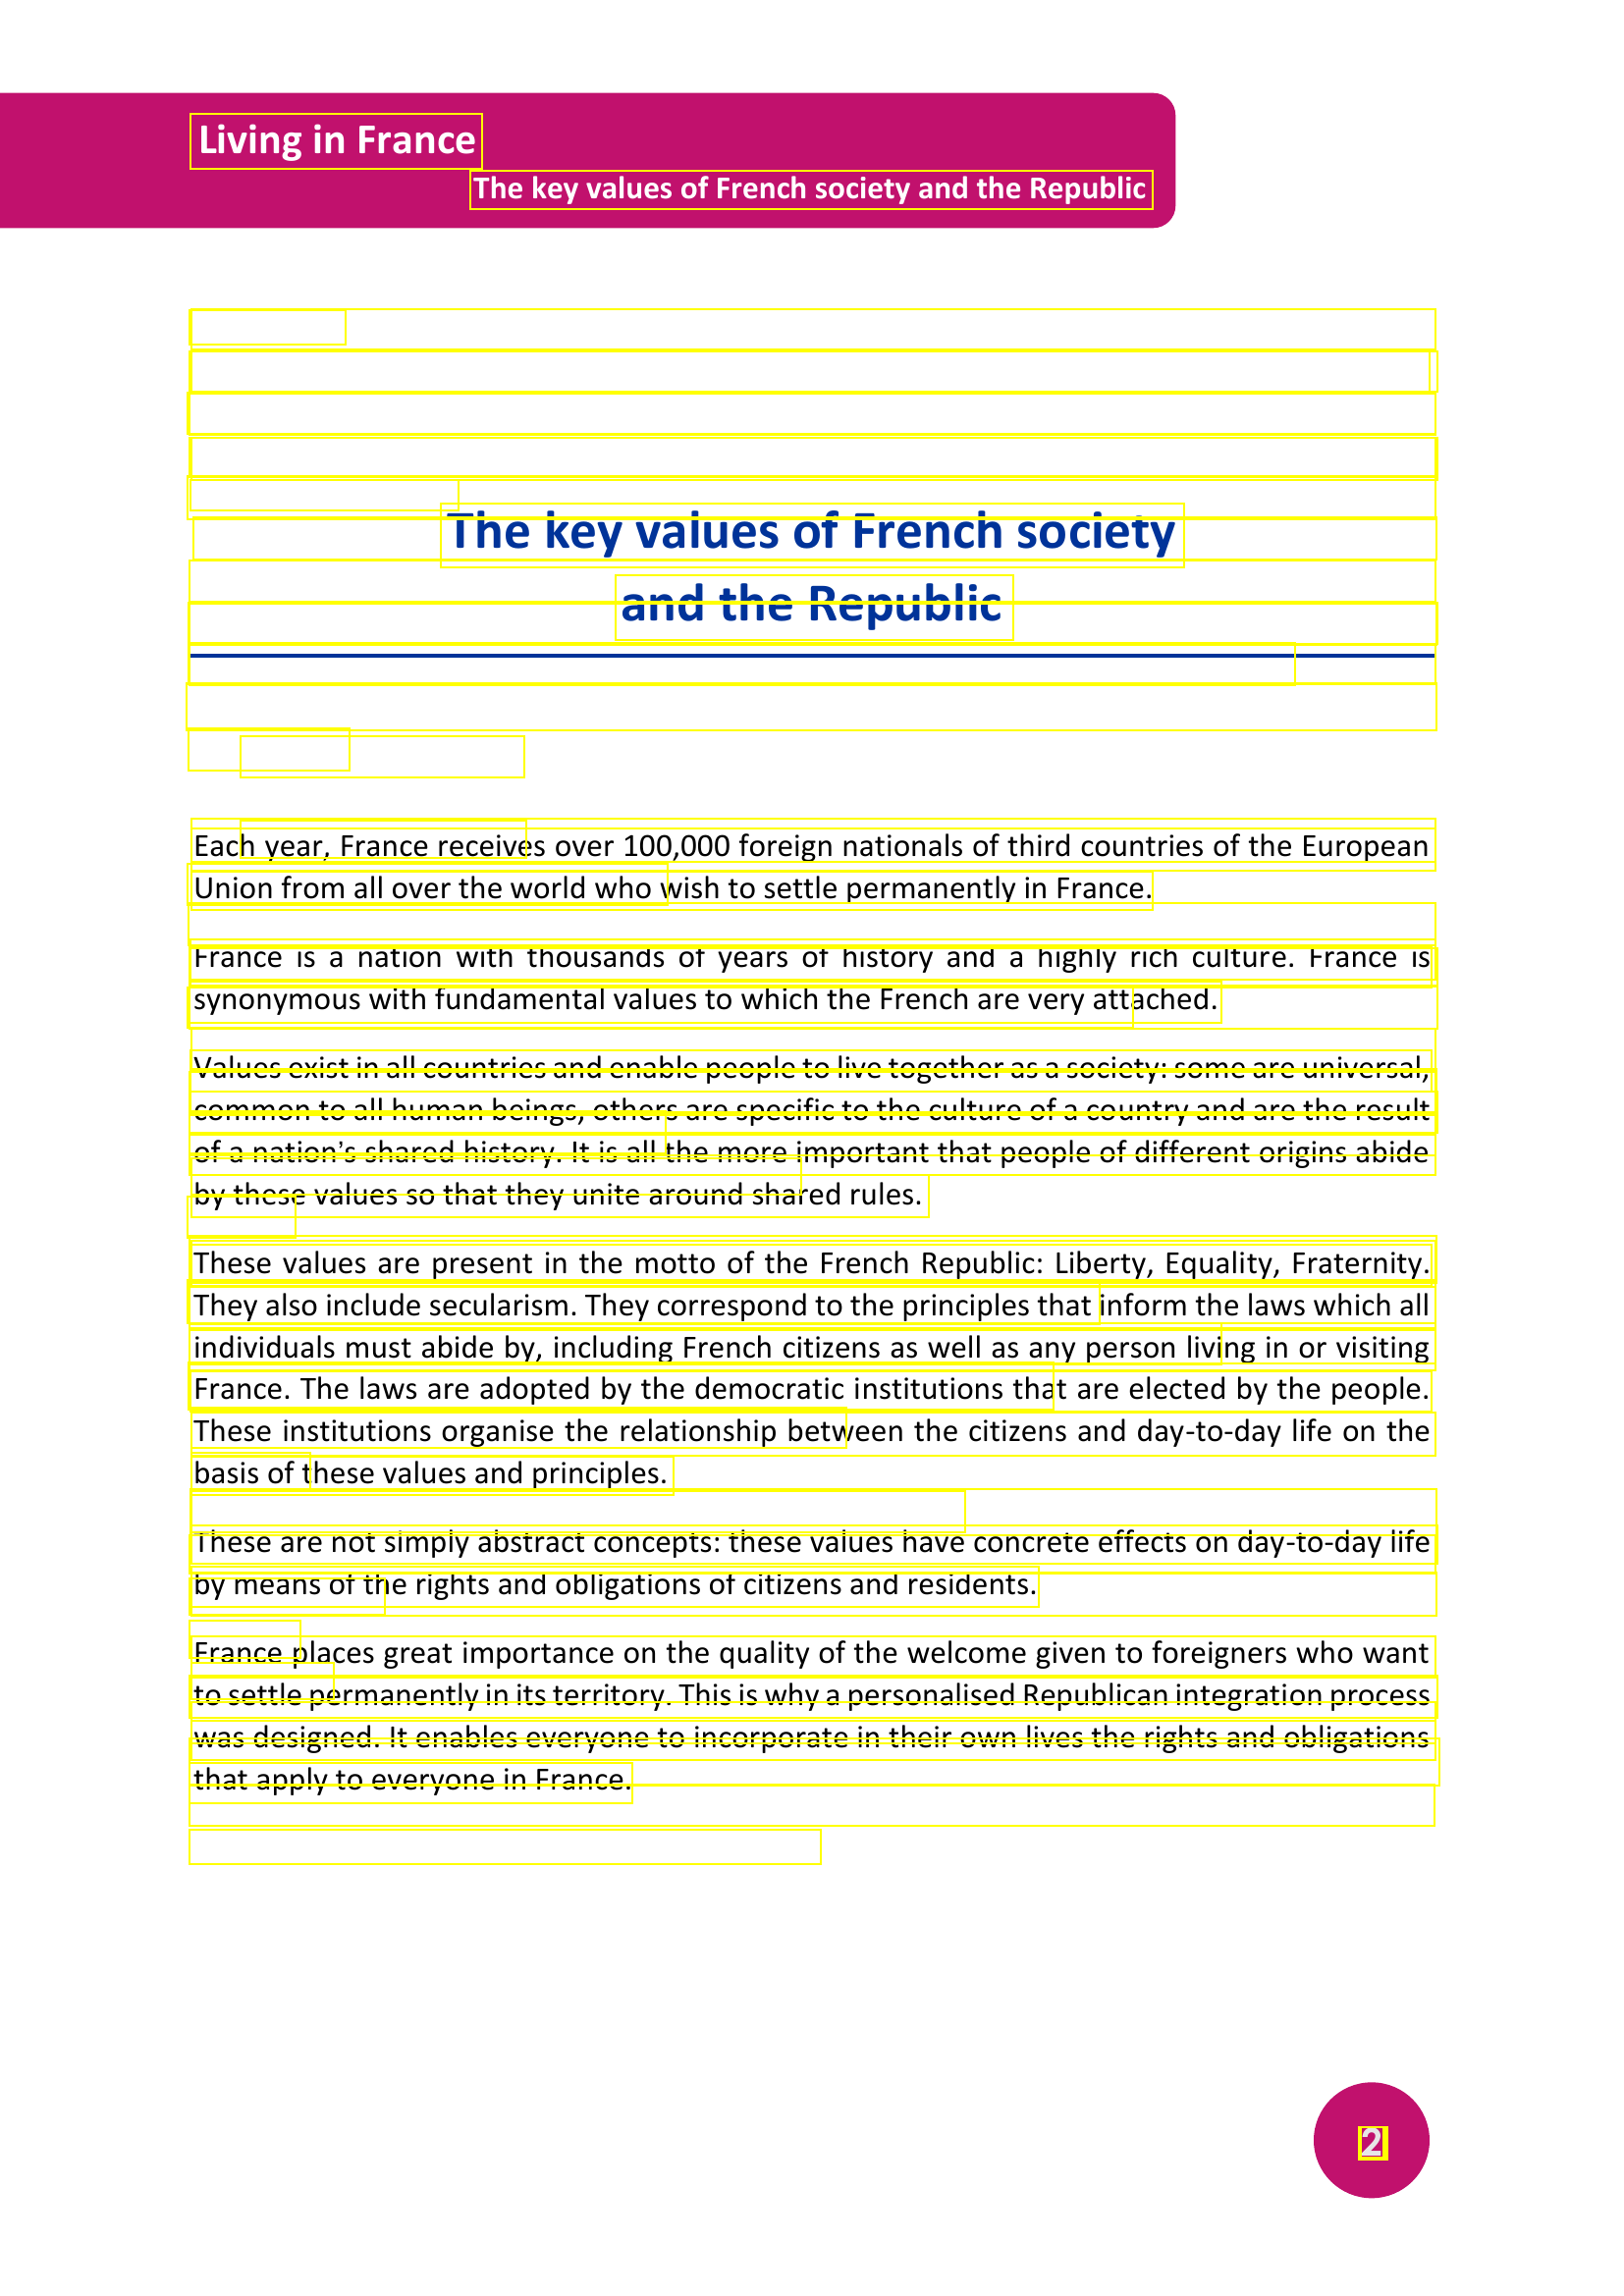

In [ ]:
draw_boxes(images[0], bounds)

In [ ]:
text=''
for i in range(len(bounds)):
  text = text + bounds[i][1] +'\n'

print(text)

Living in France
The key values of French society and the Republic
The key values of French society
and the Republic
Each year, France receives over 100,000 foreign nationals of third countries of the European
Union from all over the world who wish to settle permanently in France.
France is a nation with thousands of years of history and a highly rich culture. France is
synonymous with fundamental values to which the French are very attached:
Values exist in all countries and enable people to live together asa society: some are universal,
common to all human beings, others are specific to the culture of a country and are the result
of a nation's shared history. It is all the more important that people of different origins abide
by these values so that they unite around shared rules.
These values are present in the motto of the French Republic: Liberty, Equality, Fraternity:
They also include secularism. They correspond to the principles that inform the laws which al
individuals must ab

In [ ]:
!pip install transformers==3.1.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 884 kB 4.9 MB/s 
     |████████████████████████████████| 3.0 MB 51.1 MB/s 
     |████████████████████████████████| 880 kB 46.4 MB/s 
     |████████████████████████████████| 1.3 MB 66.2 MB/s 
  Created wheel for sacremoses: filename=sacremoses-0.0.53-py3-none-any.whl size=895260 sha256=24e4cd7de0dd317b9546175e6bb568a6518af60be77dfee6bde5cfc97fd05141
  Stored in directory: /root/.cache/pip/wheels/82/ab/9b/c15899bf659ba74f623ac776e861cf2eb8608c1825ddec66a4
Successfully built sacremoses


Télechagement d'un modèle BERT pré-entrainé. Celui-ci est issue de la base de données SQUAD. 
uncased= pas de différence entre miniscule et majuscule

In [ ]:
import torch
from transformers import BertForQuestionAnswering
model = BertForQuestionAnswering.from_pretrained('bert-base-multilingual-uncased')

Downloading:   0%|          | 0.00/625 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/672M [00:00<?, ?B/s]

Some weights of the model checkpoint at bert-base-multilingual-uncased were not used when initializing BertForQuestionAnswering: ['cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertForQuestionAnswering from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPretraining model).
- This IS NOT expected if you are initializing BertForQuestionAnswering from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForQuestionAnswering were not initialized from the model checkpoint at bert-b

In [ ]:
from transformers import BertTokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-multilingual-cased')
# Téléchargement d'un tokenizer préentrainé

Downloading:   0%|          | 0.00/872k [00:00<?, ?B/s]

In [ ]:
pip install nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Création d'une variable pdf_txt qui contient un texte. Nous pouvons aussi extraire le texte directement d'un pdf comme pour le modele word2vec avec les commandes suivantes: 

'import pdfplumber

pdf = pdfplumber.open('lic_policy.pdf')

page = pdf.pages[0]

page1 = pdf.pages[1]

pdf_txt = page.extract_text() + page1.extract_text()

pdf.close()'

In [ ]:
text


import nltk
nltk.download('punkt')
tokens = nltk.sent_tokenize(text)
for t in tokens:
    print(t, "\n")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


Living in France
The key values of French society and the Republic
The key values of French society
and the Republic
Each year, France receives over 100,000 foreign nationals of third countries of the European
Union from all over the world who wish to settle permanently in France. 

France is a nation with thousands of years of history and a highly rich culture. 

France is
synonymous with fundamental values to which the French are very attached:
Values exist in all countries and enable people to live together asa society: some are universal,
common to all human beings, others are specific to the culture of a country and are the result
of a nation's shared history. 

It is all the more important that people of different origins abide
by these values so that they unite around shared rules. 

These values are present in the motto of the French Republic: Liberty, Equality, Fraternity:
They also include secularism. 

They correspond to the principles that inform the laws which al
individua

In [ ]:
question1 = "What is intelligence?"
question2= "What are the advantages of Deep Learning ?"
question3= "Definition of Machine Learning ?"


Tokenisation du texte

In [ ]:
input_ids = tokenizer.encode(question1, text, max_length=512, truncation=True)
print('The input has a total of {:} tokens.'.format(len(input_ids)))


The input has a total of 512 tokens.


In [ ]:
Impression des jetons avec et de leurs identifiants pour voir exactement ce que fait le tokenizer

In [ ]:
tokens = tokenizer.convert_ids_to_tokens(input_ids)
for token, id in zip(tokens, input_ids):
    if id == tokenizer.sep_token_id:
        print('')
    print('{:<12} {:>6,}'.format(token, id))

    if id == tokenizer.sep_token_id:
        print('')

[CLS]           101
what         11,523
is           10,127
intelligence 19,334
?               136

[SEP]           102

living       13,623
in           10,104
france       10,757
the          10,103
key          14,758
values       27,749
of           10,108
french       12,112
society      11,232
and          10,110
the          10,103
republic     13,805
the          10,103
key          14,758
values       27,749
of           10,108
french       12,112
society      11,232
and          10,110
the          10,103
republic     13,805
each         11,885
year         10,817
,               117
france       10,757
receives     55,488
over         10,323
100          10,445
,               117
000          10,292
foreign      15,238
nationals    67,960
of           10,108
third        12,047
countries    15,612
of           10,108
the          10,103
european     12,110
union        11,168
from         10,195
all          10,367
over         10,323
the          10,103
world        10,22

La question et pdf_txt ( le texte) peuvent être concatener ensemble, mais BERT a toujours besoin d'un moyen de les distinguer. BERT a deux encastrements spéciaux "Segment", un pour le segment "A" et un pour le segment "B". Avant que les intégrations de mots n'entrent dans les couches BERT, l'intégration du segment A doit être ajoutée aux jetons de question, et l'intégration du segment B doit être ajoutée à chacun des jetons answer_text.
Celles-ci sont gérées par la bibliothèque de transformateurs et tout ce que nous avons à faire est de spécifier '0' et '1' pour le jeton.

In [ ]:
sep_index = input_ids.index(tokenizer.sep_token_id)
num_seg_a = sep_index + 1
num_seg_b = len(input_ids) - num_seg_a
#Here We Construct the list of 0s and 1s.
segment_ids = [0]*num_seg_a + [1]*num_seg_b
# There should be a segment_id for every input token.
assert len(segment_ids) == len(input_ids)

Ici, nous alimentons pdf_txt et la question dans le modèle

In [ ]:
start_scores, end_scores = model(torch.tensor([input_ids]), token_type_ids=torch.tensor([segment_ids]))

Ici, nous trouvons les scores 'début' et 'fin' les plus élevés et combinons les jetons dans la réponse et imprimons la réponse

In [ ]:
answer_start = torch.argmax(start_scores)
answer_end = torch.argmax(end_scores)

answer = ' '.join(tokens[answer_start:answer_end+1])
print ('Question1 "' + question1 + '"' )
print('Answer: "' + answer + '"')

Question1 "What is intelligence?"
Answer: ""


Nous pouvons reconstruire tous les mots qui ont été décomposés en sous-mots.

In [ ]:
answer = tokens[answer_start]
answer = tokens[answer_start]

# Select the remaining answer tokens and join them with whitespace.
for i in range(answer_start + 1, answer_end + 1):
  # If it's a subword token, then recombine it with the previous token.
    if tokens[i][0:2] == '##':
        answer += tokens[i][2:]
        # Otherwise, add a space then the token.
    else:
        answer += ' ' + tokens[i]
print('Answer: "' + answer + '"')

Answer: "to"


Cette partie est une fonction regroupant les commandes précédentes

In [ ]:
def answer_question(question, pdf_txt):

    input_ids = tokenizer.encode(question, pdf_txt, max_length=512, truncation=True)

    print('Query has {:,} tokens.\n'.format(len(input_ids)))

    sep_index = input_ids.index(tokenizer.sep_token_id)

    num_seg_a = sep_index + 1

    num_seg_b = len(input_ids) - num_seg_a

    segment_ids = [0]*num_seg_a + [1]*num_seg_b

    assert len(segment_ids) == len(input_ids)

    start_scores, end_scores = model(torch.tensor([input_ids]), token_type_ids=torch.tensor([segment_ids]))

    all_tokens = tokenizer.convert_ids_to_tokens(input_ids)

    #print(' '.join(all_tokens[torch.argmax(start_scores) : torch.argmax(end_scores)+1]))
    #print(f'score: {torch.max(start_scores)}')
    score = float(torch.max(start_scores))
    answer_start = torch.argmax(start_scores)
    answer_end = torch.argmax(end_scores)
    tokens = tokenizer.convert_ids_to_tokens(input_ids)
    answer = tokens[answer_start]

    for i in range(answer_start + 1, answer_end + 1):

        if tokens[i][0:2] == ' ':
            answer += tokens[i][2:]

        else:
            answer += ' ' + tokens[i]
    return question1, answer, score
    print('Answer: "' + answer + '"')

In [ ]:
answer_question(question1, text)
# On applique la fonction sur la question et le texte pour obtenir une réponse

Query has 512 tokens.



('What is intelligence?', 'to', 0.909917950630188)

* Ici, nous utilisons la méthode tokenizers encode_plus pour créer nos jetons à partir de la chaîne de texte
* add_special_tokens=True ajoute des jetons BERT spéciaux comme [CLS], [SEP] et [PAD] à nos nouveaux encodages "tokénisés"
* max_length=512 indique à l'encodeur la longueur cible de nos encodages
* truncation=True garantit que nous coupons toutes les séquences qui sont plus longues que le
max_length spécifié.
* padding="max_length" indique à l'encodeur de remplir toutes les séquences plus courtes que le max_length avec des jetons de remplissage.

In [ ]:
tokens = tokenizer.encode_plus(question, pdf_txt, add_special_tokens=True, max_length=512, truncation=True, padding="max_length")
tokens

NameError: ignored

Il renvoie un dictionnaire contenant trois paires clé-valeur, input_ids,
token_type_ids et attention_mask .
Nous avons également ajouté return_tensors='pt' pour renvoyer les tenseurs PyTorch du
tokenizer (plutôt que des listes Python).

In [ ]:
tokens = tokenizer.encode_plus(pdf_txt, add_special_tokens=False, return_tensors='pt')
tokens

{'input_ids': tensor([[ 1037, 11834, 18384,  2003,  1037,  3274,  2565,  2008, 26633,  2015,
          2529,  4512,  2083,  2376, 10954,  2030,  3793, 11834,  2015,  2030,
          2119,  1012, 11834, 18384,  1010,  2460,  2005, 24691, 18384,  1010,
          2003,  2019,  7976,  4454,  1006,  9932,  1007,  3444,  2008,  2064,
          2022, 11157,  1998,  2109,  2083,  2151,  2350, 24732,  4646,  1012,
          2045,  2024,  1037,  2193,  1997, 10675,  2015,  2005, 11834, 18384,
          1010,  2164,  1000,  2831, 18384,  1010,  1000,  1000, 28516,  1010,
          1000,  1000, 10047, 28516,  1010,  1000,  1000,  9123,  4005,  1000,
          2030,  1000,  7976,  4512,  9178,  1012,  1000,  1996,  6555,  5083,
          1997,  2974,  2038,  2464,  2019,  3623,  1999,  5661,  3048,  2013,
          3151,  2000,  3617,  7248,  2000,  9099, 18908,  2007, 10390,  1012,
         15106,  2083,  2974,  2003,  2108,  3344,  2041,  2011,  5661,  2011,
         14972,  9932,  5461,  2006,  

In [ ]:
input_id_chunks = tokens['input_ids'][0].split(510)
mask_chunks = tokens['attention_mask'][0].split(510)

for tensor in input_id_chunks:
  print(len(tensor))

449


In [ ]:
a = torch.arange(10)
a

tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [ ]:
torch.cat(
    [torch.Tensor([101]), a, torch.Tensor([102])]
)

tensor([101.,   0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9., 102.])

***Préparer les morceaux***

Nous avons maintenant notre tenseur tokenisé ; nous devons le diviser en morceaux ne dépassant pas 510 jetons. Nous choisissons 510 plutôt que 512 pour laisser deux places libres pour ajouter nos jetons [CLS] et [SEP].

***Diviser***


Nous appliquons la méthode de fractionnement à la fois à nos ID d'entrée et aux tenseurs de masque d'attention (nous
n'ont pas besoin des ID de type de jeton et peuvent les supprimer). Nous avons maintenant trois morceaux pour chaque ensemble de tenseurs. Notez que nous devrons ajouter un rembourrage au dernier morceau car il ne satisfera pas la taille de tenseur de 512 requise par BERT.


***CLS et SEP***


Ensuite, nous ajoutons les jetons de début de séquence [CLS] et de séparateur [SEP]. Pour cela, nous pouvons utiliser la fonction torch.cat, qui concatène une liste de tenseurs.
Nos jetons sont déjà au format d'identification de jeton, nous pouvons donc nous référer aux jetons spéciaux
tableau ci-dessus pour créer les versions d'ID de jeton de nos jetons [CLS] et [SEP].
Parce que nous faisons cela pour plusieurs tenseurs, nous plaçons la fonction torch.cat dans
une boucle for et effectuer la concaténation pour chacun de nos morceaux individuellement.
De plus, nos blocs de masque d'attention sont concaténés avec des 1 au lieu de 101
et 102. Nous faisons cela parce que le masque d'attention ne contient pas d'ID de jeton mais
à la place un ensemble de 1 et de 0.
Les zéros dans le masque d'attention représentent l'emplacement des jetons de remplissage (que nous allons
add next), et comme [CLS] et [SEP] ne sont pas des jetons de remplissage, ils sont représentés
avec 1s.

***Rembourrage***


Nous devons ajouter un rembourrage à nos morceaux de tenseur pour nous assurer qu'ils satisfont à la longueur de tenseur de 512 requise par BERT. Nos deux premiers morceaux ne nécessitent aucun rembourrage car ils satisfont déjà à cette exigence de longueur, mais les derniers morceaux le font.
Pour vérifier si un morceau nécessite un remplissage, nous ajoutons une instruction if qui vérifie la longueur du tenseur. Si le tenseur est plus court que 512 jetons, nous ajoutons un rembourrage à l'aide de la fonction torch.cat. Nous devrions ajouter cette déclaration à la même boucle for où nous ajoutons nos jetons [CLS] et [SEP] - si vous avez besoin d'aide, j'ai inclus les scripts complets à la fin de l'article.

In [ ]:
chunksize = 512

input_id_chunks = list(tokens['input_ids'][0].split(chunksize - 2))
mask_chunks = list(tokens['attention_mask'][0].split(chunksize - 2))

for i in range(len(input_id_chunks)):
    input_id_chunks[i] = torch.cat([
        torch.tensor([101]), input_id_chunks[i], torch.tensor([102])
    ])
    mask_chunks[i] = torch.cat([
        torch.tensor([1]), mask_chunks[i], torch.tensor([1])
    ])

    pad_len = chunksize - input_id_chunks[i].shape[0]
    if pad_len > 0:
        input_id_chunks[i] = torch.cat([
            input_id_chunks[i], torch.Tensor([0] * pad_len)
        ])
        mask_chunks[i] = torch.cat([
            mask_chunks[i], torch.Tensor([0] * pad_len)
        ])

for chunk in input_id_chunks:
    print(chunk)

tensor([  101.,  1037., 11834., 18384.,  2003.,  1037.,  3274.,  2565.,  2008.,
        26633.,  2015.,  2529.,  4512.,  2083.,  2376., 10954.,  2030.,  3793.,
        11834.,  2015.,  2030.,  2119.,  1012., 11834., 18384.,  1010.,  2460.,
         2005., 24691., 18384.,  1010.,  2003.,  2019.,  7976.,  4454.,  1006.,
         9932.,  1007.,  3444.,  2008.,  2064.,  2022., 11157.,  1998.,  2109.,
         2083.,  2151.,  2350., 24732.,  4646.,  1012.,  2045.,  2024.,  1037.,
         2193.,  1997., 10675.,  2015.,  2005., 11834., 18384.,  1010.,  2164.,
         1000.,  2831., 18384.,  1010.,  1000.,  1000., 28516.,  1010.,  1000.,
         1000., 10047., 28516.,  1010.,  1000.,  1000.,  9123.,  4005.,  1000.,
         2030.,  1000.,  7976.,  4512.,  9178.,  1012.,  1000.,  1996.,  6555.,
         5083.,  1997.,  2974.,  2038.,  2464.,  2019.,  3623.,  1999.,  5661.,
         3048.,  2013.,  3151.,  2000.,  3617.,  7248.,  2000.,  9099., 18908.,
         2007., 10390.,  1012., 15106., 

In [ ]:
for tensor in range(len(input_id_chunks)):
  ans = answer_question(question, ' '.join(tokenizer.convert_ids_to_tokens(input_id_chunks[tensor])))
  print(ans)

Query has 512 tokens.

('free up phone lines and are far less expensive over the long run than hiring people to perform support', 3.8189876079559326)


In [ ]:
def expand_split_sentences(pdf_txt):
  import nltk
  nltk.download('punkt')
  new_chunks = nltk.sent_tokenize(pdf_txt)
  length = len(new_chunks)
  #for i in range(length):
    #tmp_token = tokenizer.encode(new_chunks[i])
    #print('The input has a total of {:} tokens.'.format(len(tmp_token)))

  new_df = [];
  for i in range(length):
    paragraph = ""
    for j in range(i, length):
      #tmp_str = paragraph + new_chunks[j]
      tmp_token = tokenizer.encode(paragraph + new_chunks[j])
      length_token = len(tmp_token)
      if length_token < 510:
        #print(length_token)
        paragraph = paragraph + new_chunks[j]
      else:
        #print(length_token)
        break;
    #print(len(tokenizer.encode(paragraph)))
    new_df.append(paragraph)
  return new_df
  #for i in new_df:
    #print(i)

In [ ]:
max_score = 0;
final_answer = ""
new_df = expand_split_sentences(pdf_txt)
for new_context in new_df:
  #new_paragrapgh = new_paragrapgh + answer_question(question, answer_text)
  ans, score = answer_question(question, new_context)
  if score > max_score:
    max_score = score
    final_answer = ans
print(question)
print(final_answer)
print(max_score)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Query has 459 tokens.

Query has 437 tokens.

Query has 409 tokens.

Query has 372 tokens.

Query has 349 tokens.

Query has 331 tokens.

Query has 316 tokens.

Query has 283 tokens.

Query has 258 tokens.

Query has 234 tokens.

Query has 207 tokens.

Query has 187 tokens.

Query has 165 tokens.

Query has 141 tokens.

Query has 117 tokens.

Query has 108 tokens.

Query has 83 tokens.

Query has 63 tokens.

Query has 42 tokens.

free up phone lines and are far less expensive over the long run than hiring people to perform support
5.080368995666504


Nous pouvons voir que nous obtenons un ensemble de trois valeurs d'activation pour chaque morceau.
Ces valeurs d'activation ne sont pas encore nos probabilités de sortie. Pour les transformer en
probabilités de sortie, nous devons appliquer une fonction softmax au tenseur de sortie.

Enfin, nous prenons la moyenne des valeurs de chaque classe (ou colonne) pour obtenir notre probabilité finale de sentiment positif, négatif ou neutre.

In [ ]:
input_ids = torch.stack(input_id_chunks)
attention_mask = torch.stack(mask_chunks)

input_dict = {
    'input_ids': input_ids.long(),
    'attention_mask': attention_mask.int()
}
input_dict

{'input_ids': tensor([[  101,  2166,  5427,  ...,  1012,  2107,   102],
         [  101, 29361,  2024,  ...,  2064,  2022,   102],
         [  101,  3876,  2006,  ...,     0,     0,     0]]),
 'attention_mask': tensor([[1, 1, 1,  ..., 1, 1, 1],
         [1, 1, 1,  ..., 1, 1, 1],
         [1, 1, 1,  ..., 0, 0, 0]], dtype=torch.int32)}

In [ ]:
outputs = model(**input_dict)
probs = torch.nn.functional.softmax(outputs[0], dim=-1)
probs = probs.mean(dim=0)
probs

tensor([4.2047e-01, 7.3233e-03, 3.8704e-04, 3.7146e-04, 2.4710e-04, 4.9905e-04,
        9.1580e-05, 7.2339e-04, 2.8726e-04, 2.7150e-04, 2.2355e-04, 5.9827e-05,
        1.0277e-03, 5.1559e-05, 4.3810e-05, 1.1908e-04, 2.0978e-04, 1.3863e-04,
        4.2432e-05, 5.6722e-05, 7.6533e-05, 6.9248e-04, 9.3073e-05, 3.7591e-04,
        4.3682e-05, 4.0332e-04, 6.2978e-05, 8.4359e-05, 1.1684e-04, 4.9767e-05,
        2.4577e-04, 2.9513e-05, 1.8508e-04, 9.6008e-04, 1.3457e-04, 5.4936e-05,
        5.5473e-05, 1.6459e-04, 6.7666e-05, 1.0982e-04, 6.5894e-05, 5.0604e-05,
        8.9084e-05, 1.5366e-04, 4.3831e-05, 1.7032e-04, 6.9928e-04, 5.5394e-05,
        2.6971e-04, 4.2740e-05, 2.9958e-05, 8.3827e-05, 7.3587e-05, 1.0709e-04,
        5.4899e-04, 5.5681e-05, 3.9024e-05, 3.3720e-04, 4.9262e-05, 9.6260e-05,
        5.3931e-05, 1.5222e-04, 7.0258e-04, 2.5524e-03, 1.5948e-04, 1.0690e-03,
        6.7079e-05, 8.0789e-04, 2.0365e-03, 6.5701e-05, 1.2064e-04, 2.8996e-04,
        2.1347e-04, 5.6888e-05, 2.1249e-